L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

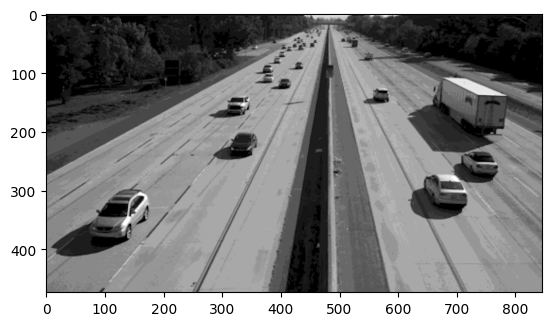

In [26]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

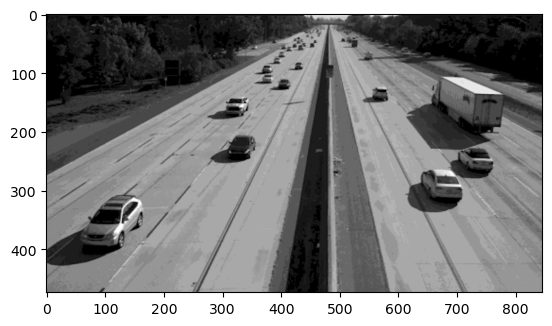

In [322]:
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

In [27]:
corner1=cv.goodFeaturesToTrack(img1,maxCorners=1000, qualityLevel=0.01, minDistance=1)
corner2=cv.goodFeaturesToTrack(img2,1000,0.01,10)
corner1=corner1.astype(int)
corner1=corner1.reshape((len(corner1), 2))
corner2=corner2.astype(int)
corner2=corner2.reshape((len(corner2), 2))

In [332]:
len(img1[0])

846

In [ ]:
corner1=list(corner1)
temp=[]
for point in corner1:
    x, y = point
    if img1.shape[0]<x or img1.shape[1]<y:
        temp.append(point)
corner1=np.array(temp)

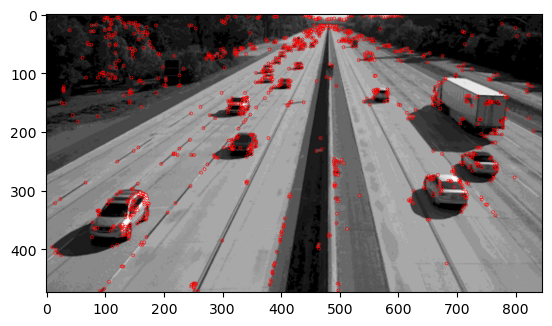

In [362]:
img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
for i in corner1: cv.circle(img1,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img1,cmap='gray')

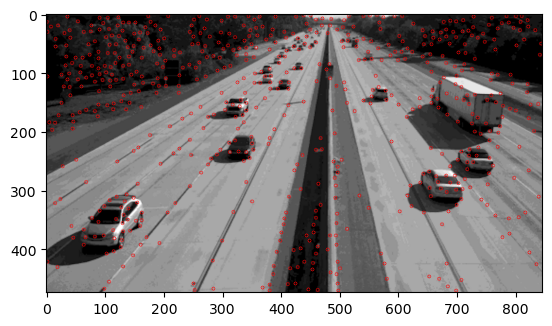

In [18]:
img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
for i in corner2: cv.circle(img2,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img2,cmap='gray')

In [148]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
flow=cv.calcOpticalFlowFarneback(img1,img2,None, 0.5, 3, 15, 5, 7, 1.5, 0)

In [149]:
flow

array([[[-1.1156737e-02,  1.4349869e-03],
        [ 5.2740965e-03,  7.4726683e-03],
        [ 4.5550778e-03,  1.0561115e-02],
        ...,
        [ 7.0933322e-03,  3.9364882e-03],
        [ 1.1880102e-02,  4.6866843e-03],
        [ 1.7337184e-02,  5.5631609e-03]],

       [[-3.9083012e-03, -3.8711093e-03],
        [ 1.2277249e-02,  3.2990668e-03],
        [ 1.5607214e-02,  7.0390063e-03],
        ...,
        [ 1.2640953e-02,  4.3630395e-03],
        [ 1.6011691e-02,  5.2472930e-03],
        [ 1.9672086e-02,  6.3086948e-03]],

       [[ 1.5893542e-04, -9.3087815e-03],
        [ 1.3147939e-02, -9.4574853e-04],
        [ 1.7055040e-02,  3.3614084e-03],
        ...,
        [ 1.1180574e-02,  4.9378374e-03],
        [ 1.3452677e-02,  6.0194293e-03],
        [ 1.5875693e-02,  7.3674852e-03]],

       ...,

       [[-1.9907157e-03, -2.0053226e-03],
        [-2.2885178e-03, -2.0942658e-03],
        [-2.6765387e-03, -2.1939964e-03],
        ...,
        [ 9.5571606e-12,  1.5884175e-12],
     

In [50]:
u=flow[:,:,0]
v=flow[:,:,1]

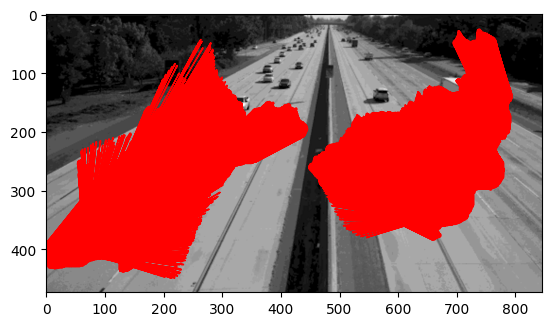

In [51]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')
S=np.shape(img1)
for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>5 or abs(v[i,j])>5:
                plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")
plt.show()

# Ma methode

In [229]:
from scipy import signal 
def flow_optique(img1,img2):
        corner1=cv.goodFeaturesToTrack(img1,maxCorners=100, qualityLevel=0.01, minDistance=5)
        corner1=corner1.astype(int)
        corner1=corner1.reshape((len(corner1), 2))
        gradienx=signal.convolve2d(img1,[[-1,1],[-1,1]],"same")+signal.convolve2d(img2,[[-1,1],[-1,1]],"same")
        gradieny=signal.convolve2d(img1,[[-1,-1],[1,1]],"same")+signal.convolve2d(img2,[[-1,-1],[1,1]],"same")
        A=[]
        b=[]
        v={}
        v=np.zeros((img1.shape[0],img1.shape[1],2))
        for i in corner1:
            voisins=[(i[1]+k,i[0]+l) for k in [-1,1,0] for l in [-1,1,0] if k*l+k+l!=0]
            # voisins=[]
            for voisin in voisins:
                A.append([gradienx[voisin[0],voisin[1]],gradieny[voisin[0],voisin[1]]])
                b.append((img2-img1)[voisin[0],voisin[1]])
            A=np.array(A)
            b=np.array(b)
            v[i[1],i[0]]=np.linalg.inv(A.T@A)@A.T@b
            b=[]
            A=[]
        return v

In [233]:
v.max()

2.294740443625132

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

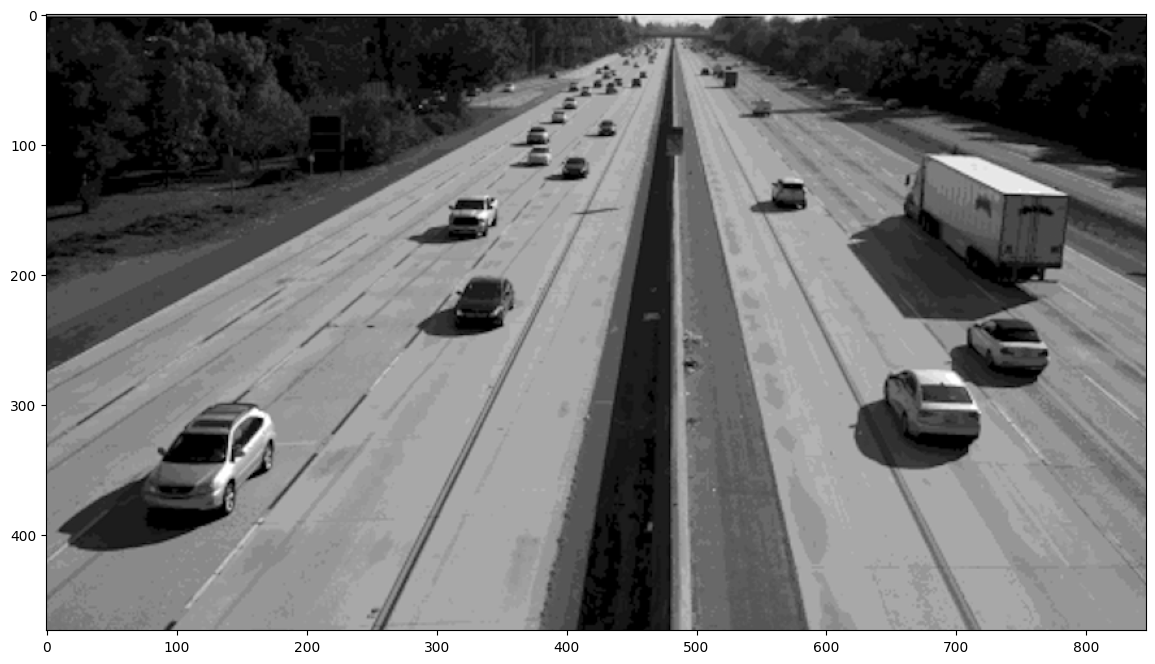

In [230]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
v=flow_optique(img1,img2)
plt.figure(figsize=(16,8))
plt.imshow(img1,cmap='gray')
for i in v.keys(:
     if abs(v[i][0])>0.1 or abs(v[i][1])>0.1:
        plt.arrow(i[1],i[0],10*v[i][1],10*v[i][0], head_width = 5, head_length = 4, color = "r")
plt.show()

(474, 846, 2)

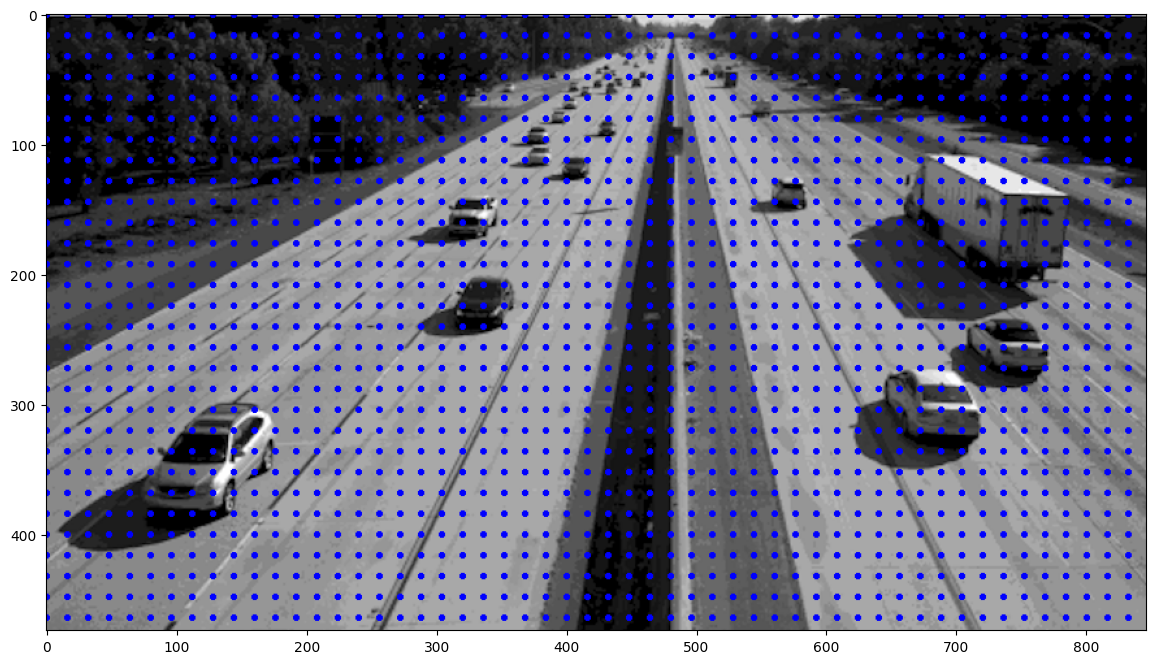

In [240]:
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    # flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 15, 3, 5, 1, 0)
    flow=flow_optique(img1,img2)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
    return flow.shape

visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)


(474, 846, 2)

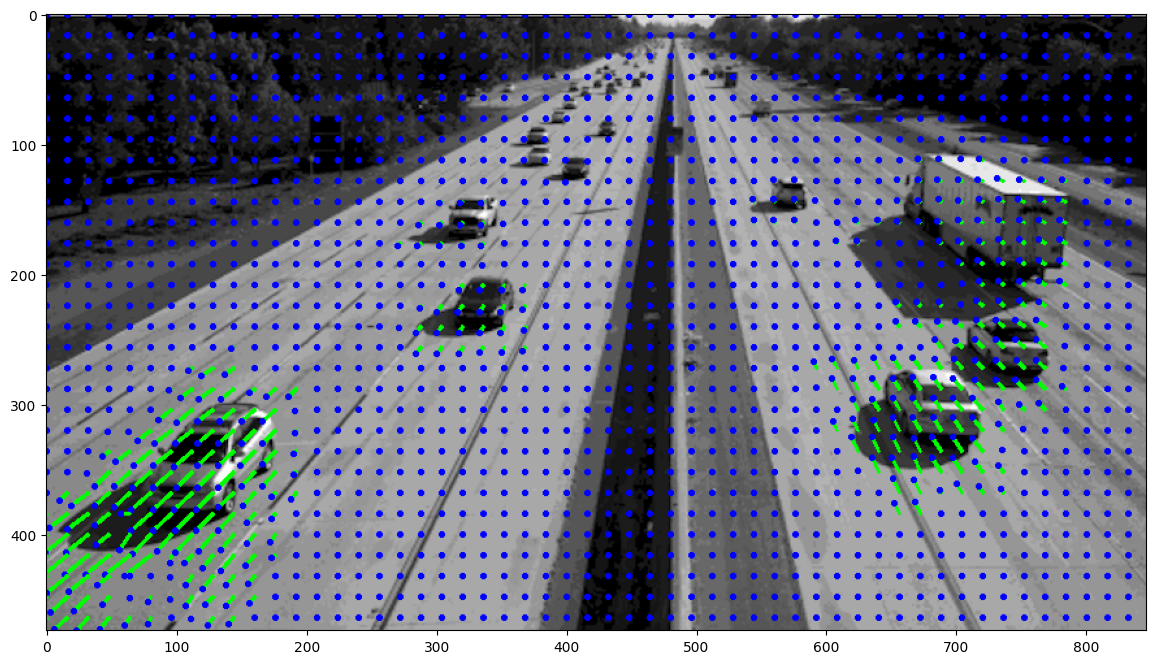

In [237]:
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 15, 3, 5, 1, 0)
    #fow=flow_optique(img1,img2)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
    return flow.shape

visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)

In [157]:
from scipy import signal 
def flow_optique(img1,img2):
        corner1=cv.goodFeaturesToTrack(img1,maxCorners=100, qualityLevel=0.01, minDistance=5)
        corner1=corner1.astype(int)
        corner1=corner1.reshape((len(corner1), 2))
        gradienx=signal.convolve2d(img1,[[-1,1],[-1,1]],"same")+signal.convolve2d(img2,[[-1,1],[-1,1]],"same")
        gradieny=signal.convolve2d(img1,[[-1,-1],[1,1]],"same")+signal.convolve2d(img2,[[-1,-1],[1,1]],"same")
        A=[]
        b=[]
        v={}
        for i in corner1:
            voisins=[(i[0]+k,i[1]+l) for k in [-1,1,0] for l in [-1,1,0] if k*l+k+l!=0]
            for voisin in voisins:
                A.append([gradienx[voisin[1],voisin[0]],gradieny[voisin[1],voisin[0]]])
                b.append((img2-img1)[voisin[1],voisin[0]])
            A=np.array(A)
            b=np.array(b)
            v[tuple(i)]=np.linalg.inv(A.T@A)@A.T@b
            b=[]
            A=[]
        return v

array([1, 6, 4])

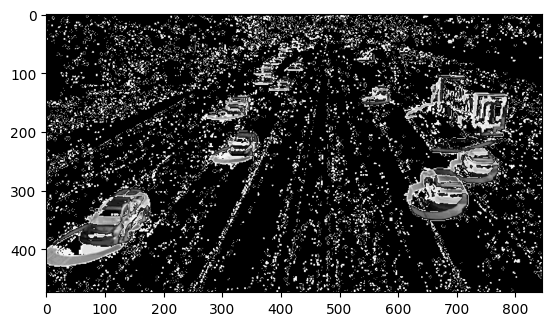

In [159]:
plt.imshow(img2-img1,cmap='gray')